In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
ionosphere = fetch_ucirepo(id=52) 
  
# data (as pandas dataframes) 
X = ionosphere.data.features 
y = ionosphere.data.targets 
  
# metadata 
print(ionosphere.metadata) 
  
# variable information 
print(ionosphere.variables) 

{'uci_id': 52, 'name': 'Ionosphere', 'repository_url': 'https://archive.ics.uci.edu/dataset/52/ionosphere', 'data_url': 'https://archive.ics.uci.edu/static/public/52/data.csv', 'abstract': 'Classification of radar returns from the ionosphere', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 351, 'num_features': 34, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Sun Jan 01 1989', 'dataset_doi': '10.24432/C5W01B', 'creators': ['V. Sigillito', 'S. Wing', 'L. Hutton', 'K. Baker'], 'intro_paper': None, 'additional_info': {'summary': 'This radar data was collected by a system in Goose Bay, Labrador.  This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts.  See the paper for more details.  

Accuracy:  0.8113207547169812
Confusion Matrix:
 [[39  0]
 [20 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      1.00      0.80        39
           1       1.00      0.70      0.82        67

    accuracy                           0.81       106
   macro avg       0.83      0.85      0.81       106
weighted avg       0.88      0.81      0.81       106



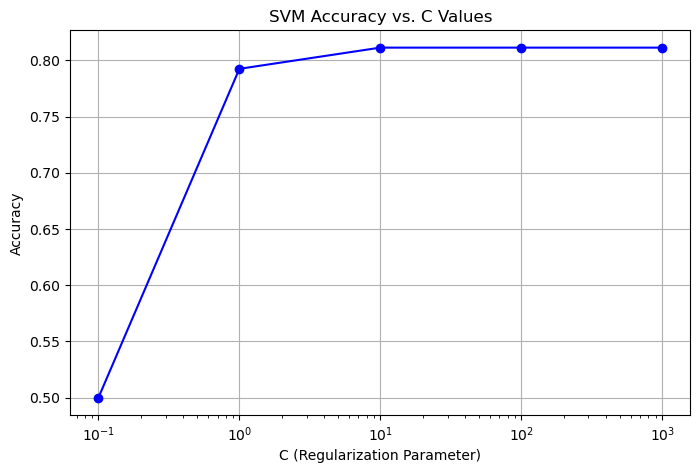

C=0.1: Accuracy = 0.5000
C=1: Accuracy = 0.7925
C=10: Accuracy = 0.8113
C=100: Accuracy = 0.8113
C=1000: Accuracy = 0.8113


In [2]:
#Using SVM for Radar Return Classification
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.svm import SVC  # Using Support Vector Classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # For model evaluation
from imblearn.over_sampling import SMOTE  # To handle class imbalance
from sklearn.preprocessing import StandardScaler  # Scaling features
import matplotlib.pyplot as plt  # For plotting results
import seaborn as sns  # For visualization

# Step 1: Loading the dataset
data_url = 'https://archive.ics.uci.edu/static/public/52/data.csv'  # URL for the Ionosphere dataset
df = pd.read_csv(data_url)

# Step 2: Prepare the target column
df['Class'] = df['Class'].apply(lambda x: 1 if x == 'g' else 0)

# Step 3: Split the data into features and target
X = df.drop('Class', axis=1)  # Features (all columns except 'Class')
y = df['Class']  # Target variable

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)  # Transform the test data

# Step 6: Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Step 7: Train the Support Vector Classifier (SVC)
# SVM with RBF kernel
svc = SVC(kernel='rbf', C=100, gamma=1, random_state=42)
svc.fit(X_resampled, y_resampled)

# Step 8: Making predictions on the test set
y_pred = svc.predict(X_test_scaled)

# Step 9: Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 10: Evaluate accuracy for different C values and plot the line chart
C_values = [0.1, 1, 10, 100, 1000]  # Different C values to test
accuracies = []  # List to store accuracy scores

for C in C_values:
    svc = SVC(kernel='rbf', C=C, gamma=1, random_state=42)
    svc.fit(X_resampled, y_resampled)
    y_pred_temp = svc.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_temp)
    accuracies.append(acc)

# Plotting the accuracies as a line chart
plt.figure(figsize=(8, 5))
plt.plot(C_values, accuracies, marker='o', linestyle='-', color='b')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.title('SVM Accuracy vs. C Values')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Print accuracies for each C value
for i, C in enumerate(C_values):
    print(f"C={C}: Accuracy = {accuracies[i]:.4f}")


Accuracy on Test Set:  0.8113207547169812
Confusion Matrix:
 [[39  0]
 [20 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      1.00      0.80        39
           1       1.00      0.70      0.82        67

    accuracy                           0.81       106
   macro avg       0.83      0.85      0.81       106
weighted avg       0.88      0.81      0.81       106



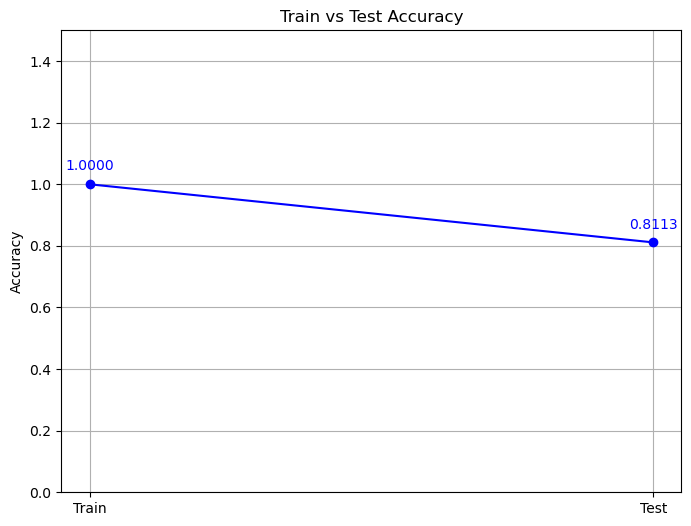

Train Accuracy: 1.0000
Test Accuracy: 0.8113


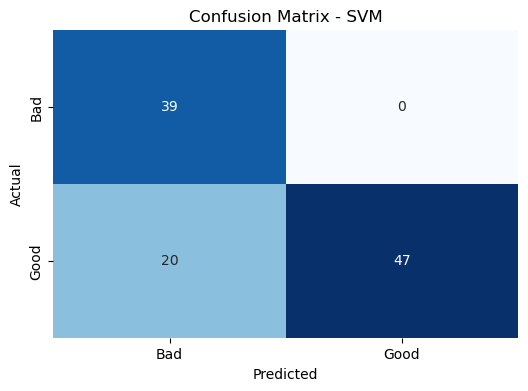

In [3]:
#Using Support Vector Classifier
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.svm import SVC #For using the support vector classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # For model evaluation
from imblearn.over_sampling import SMOTE  # To handle class imbalance
from sklearn.preprocessing import StandardScaler  # Scaling features
import matplotlib.pyplot as plt  # For plotting results
import seaborn as sns  # For visualization

# Function to train an SVM classifier and handle data balancing
def svm_with_smote(X, y, test_size=0.3, random_state=42, C=100, gamma=1):
    """
    This function applies SMOTE for handling class imbalance, trains an SVM classifier, 
    and evaluates its performance on the test set.
    
    Parameters:
    X (DataFrame): Features
    y (Series): Target variable
    test_size (float): Fraction of the dataset to be used as test data
    random_state (int): Random state for reproducibility
    C (float): Regularization parameter for SVM
    gamma (float): Kernel coefficient for the RBF kernel
    
    Returns:
    None: Prints the model evaluation results and plots the confusion matrix and accuracy graph
    """
    # Step 1: Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Step 2: Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
    X_test_scaled = scaler.transform(X_test)  # Transform the test data

    # Step 3: Balance the dataset using SMOTE
    smote = SMOTE(random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

    # Step 4: Train the Support Vector Classifier (SVC) with RBF kernel
    svc = SVC(kernel='rbf', C=C, gamma=gamma, random_state=random_state)
    svc.fit(X_resampled, y_resampled)

    # Step 5: Making predictions
    y_pred_train = svc.predict(X_train_scaled)  # Predictions on the training set
    y_pred_test = svc.predict(X_test_scaled)  # Predictions on the test set
    
    # Step 6: Calculate and print evaluation metrics
    print("Accuracy on Test Set: ", accuracy_score(y_test, y_pred_test))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
    print("Classification Report:\n", classification_report(y_test, y_pred_test))

    # Step 7: Calculate train and test accuracies for visualization
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Plot the accuracies
    plt.figure(figsize=(8, 6))
    plt.plot(['Train', 'Test'], [train_accuracy, test_accuracy], marker='o', label="Accuracy", color='b')
    plt.title('Train vs Test Accuracy')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.5)
    plt.grid(True)
    plt.annotate(f"{train_accuracy:.4f}", (0, train_accuracy), textcoords="offset points", xytext=(0, 10), ha='center', color='blue')
    plt.annotate(f"{test_accuracy:.4f}", (1, test_accuracy), textcoords="offset points", xytext=(0, 10), ha='center', color='blue')
    plt.show()

    # Print numerical values for clarity
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Step 8: Plotting the confusion matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
    plt.title('Confusion Matrix - SVM')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Loading the dataset
data_url = 'https://archive.ics.uci.edu/static/public/52/data.csv'  # URL for the Ionosphere dataset
df = pd.read_csv(data_url)

# Prepare the target column
df['Class'] = df['Class'].apply(lambda x: 1 if x == 'g' else 0)

# Split the data into features and target
X = df.drop('Class', axis=1)  # Features (all columns except 'Class')
y = df['Class']  # Target variable

# Call the function
svm_with_smote(X, y, test_size=0.3, random_state=42, C=100, gamma=1)


In [4]:
!pip install xgboost


D:\python\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:53:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\python\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:53:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\python\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:53:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\python\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:53:22] WARNING: C:\bui

Overall Train Accuracy: 1.0000
Overall Test Accuracy: 0.8991


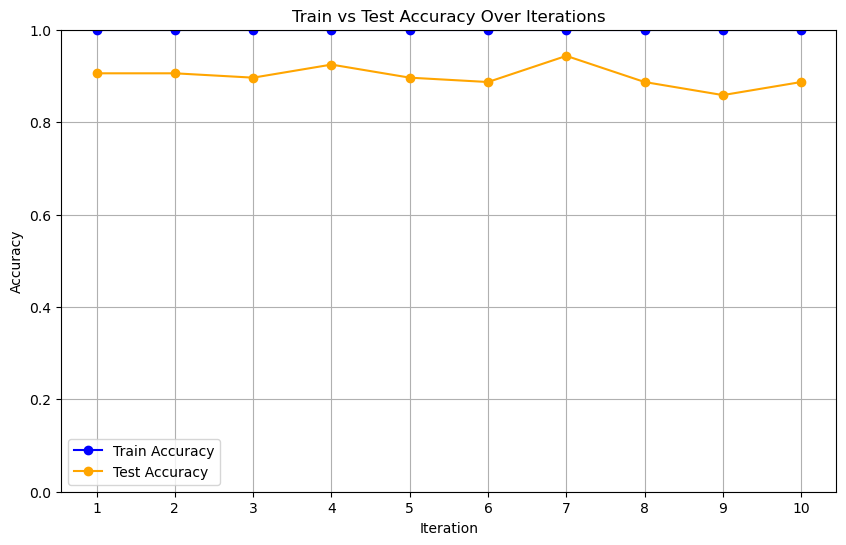

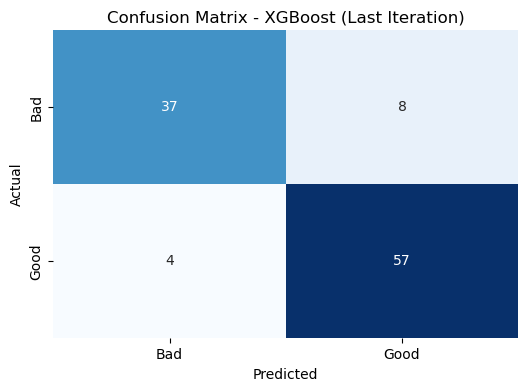

In [5]:
#using Xboost method
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # For model evaluation
from imblearn.over_sampling import SMOTE  # To handle class imbalance
from sklearn.preprocessing import StandardScaler  # Scaling features
import matplotlib.pyplot as plt  # For plotting results
import seaborn as sns  # For visualization
from xgboost import XGBClassifier  # Using XGBoost Classifier

# Function to train XGBoost classifier and calculate accuracy over multiple iterations
def xboost_with_accuracy_graph(X, y, test_size=0.3, n_iterations=10, random_state_start=42):
    """
    Trains XGBoost classifier over multiple iterations to calculate train/test accuracy and overall accuracy.
    
    Parameters:
    X (DataFrame): Features
    y (Series): Target variable
    test_size (float): Fraction of the dataset to be used as test data
    n_iterations (int): Number of iterations for training with different random states
    random_state_start (int): Initial random state for reproducibility
    
    Returns:
    None: Prints overall accuracy and plots graphs for accuracy trends and confusion matrix.
    """
    train_accuracies = []
    test_accuracies = []

    for i in range(n_iterations):
        random_state = random_state_start + i
        
        # Step 1: Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        # Step 2: Scale the data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
        X_test_scaled = scaler.transform(X_test)  # Transform the test data

        # Step 3: Balance the dataset using SMOTE
        smote = SMOTE(random_state=random_state)
        X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

        # Step 4: Train the XGBoost Classifier
        xgb = XGBClassifier(random_state=random_state, use_label_encoder=False, eval_metric='logloss')
        xgb.fit(X_resampled, y_resampled)

        # Step 5: Make predictions
        y_pred_train = xgb.predict(X_train_scaled)
        y_pred_test = xgb.predict(X_test_scaled)

        # Step 6: Calculate accuracies
        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    # Calculate overall accuracy
    overall_train_accuracy = np.mean(train_accuracies)
    overall_test_accuracy = np.mean(test_accuracies)

    # Print overall accuracy
    print(f"Overall Train Accuracy: {overall_train_accuracy:.4f}")
    print(f"Overall Test Accuracy: {overall_test_accuracy:.4f}")

    # Plot line graph of accuracies
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_iterations + 1), train_accuracies, label='Train Accuracy', marker='o', color='blue')
    plt.plot(range(1, n_iterations + 1), test_accuracies, label='Test Accuracy', marker='o', color='orange')
    plt.title('Train vs Test Accuracy Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.xticks(range(1, n_iterations + 1))
    plt.legend()
    plt.grid(True)
    plt.show()

    # Step 7: Confusion Matrix for the last iteration
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, xgb.predict(X_test_scaled))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
    plt.title('Confusion Matrix - XGBoost (Last Iteration)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Load the dataset
data_url = 'https://archive.ics.uci.edu/static/public/52/data.csv'  # URL for the Ionosphere dataset
df = pd.read_csv(data_url)

# Prepare the target column
df['Class'] = df['Class'].apply(lambda x: 1 if x == 'g' else 0)

# Split the data into features and target
X = df.drop('Class', axis=1)  # Features (all columns except 'Class')
y = df['Class']  # Target variable

# Call the function
xboost_with_accuracy_graph(X, y, test_size=0.3, n_iterations=10, random_state_start=42)


D:\python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum 

Overall Train Accuracy: 0.9939
Overall Test Accuracy: 0.9066


D:\python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


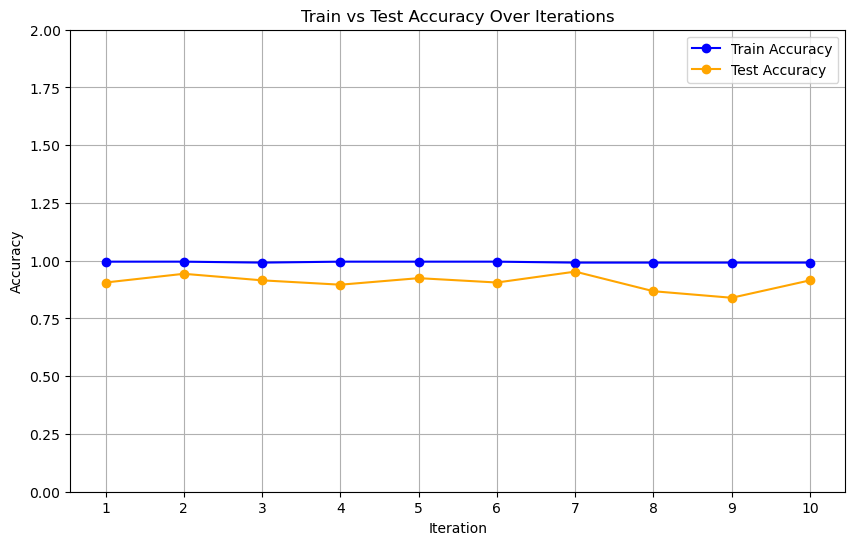

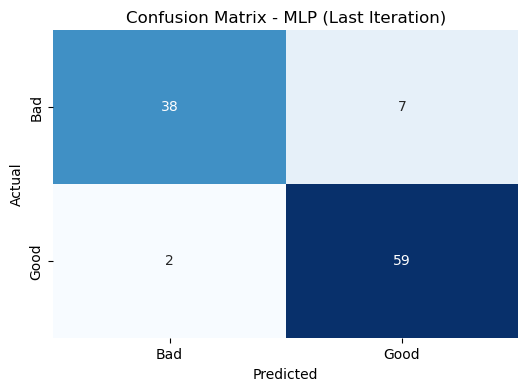

In [6]:
#using decision tree
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # For model evaluation
from imblearn.over_sampling import SMOTE  # To handle class imbalance
from sklearn.preprocessing import StandardScaler  # Scaling features
from sklearn.neural_network import MLPClassifier  # Using MLP Classifier
import matplotlib.pyplot as plt  # For plotting results
import seaborn as sns  # For visualization

# Function to train MLP classifier and calculate accuracy over multiple iterations
def mlp_with_accuracy_graph(X, y, test_size=0.3, n_iterations=10, random_state_start=42, hidden_layer_sizes=(100,)):
    """
    Trains MLP classifier over multiple iterations to calculate train/test accuracy and overall accuracy.
    
    Parameters:
    X (DataFrame): Features
    y (Series): Target variable
    test_size (float): Fraction of the dataset to be used as test data
    n_iterations (int): Number of iterations for training with different random states
    random_state_start (int): Initial random state for reproducibility
    hidden_layer_sizes (tuple): Size of hidden layers for the MLP
    
    Returns:
    None: Prints overall accuracy and plots graphs for accuracy trends and confusion matrix.
    """
    train_accuracies = []
    test_accuracies = []

    for i in range(n_iterations):
        random_state = random_state_start + i
        
        # Step 1: Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        # Step 2: Scale the data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
        X_test_scaled = scaler.transform(X_test)  # Transform the test data

        # Step 3: Balance the dataset using SMOTE
        smote = SMOTE(random_state=random_state)
        X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

        # Step 4: Train the MLP Classifier
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, random_state=random_state, max_iter=300)
        mlp.fit(X_resampled, y_resampled)

        # Step 5: Make predictions
        y_pred_train = mlp.predict(X_train_scaled)
        y_pred_test = mlp.predict(X_test_scaled)

        # Step 6: Calculate accuracies
        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    # Calculate overall accuracy
    overall_train_accuracy = np.mean(train_accuracies)
    overall_test_accuracy = np.mean(test_accuracies)

    # Print overall accuracy
    print(f"Overall Train Accuracy: {overall_train_accuracy:.4f}")
    print(f"Overall Test Accuracy: {overall_test_accuracy:.4f}")

    # Plot line graph of accuracies
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_iterations + 1), train_accuracies, label='Train Accuracy', marker='o', color='blue')
    plt.plot(range(1, n_iterations + 1), test_accuracies, label='Test Accuracy', marker='o', color='orange')
    plt.title('Train vs Test Accuracy Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.ylim(0, 2)
    plt.xticks(range(1, n_iterations + 1))
    plt.legend()
    plt.grid(True)
    plt.show()

    # Step 7: Confusion Matrix for the last iteration
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, mlp.predict(X_test_scaled))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
    plt.title('Confusion Matrix - MLP (Last Iteration)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Load the dataset
data_url = 'https://archive.ics.uci.edu/static/public/52/data.csv'  # URL for the Ionosphere dataset
df = pd.read_csv(data_url)

# Prepare the target column
df['Class'] = df['Class'].apply(lambda x: 1 if x == 'g' else 0)

# Split the data into features and target
X = df.drop('Class', axis=1)  # Features (all columns except 'Class')
y = df['Class']  # Target variable

# Call the function
mlp_with_accuracy_graph(X, y, test_size=0.3, n_iterations=10, random_state_start=42, hidden_layer_sizes=(100,))


Overall Train Accuracy: 0.9192
Overall Test Accuracy: 0.8953


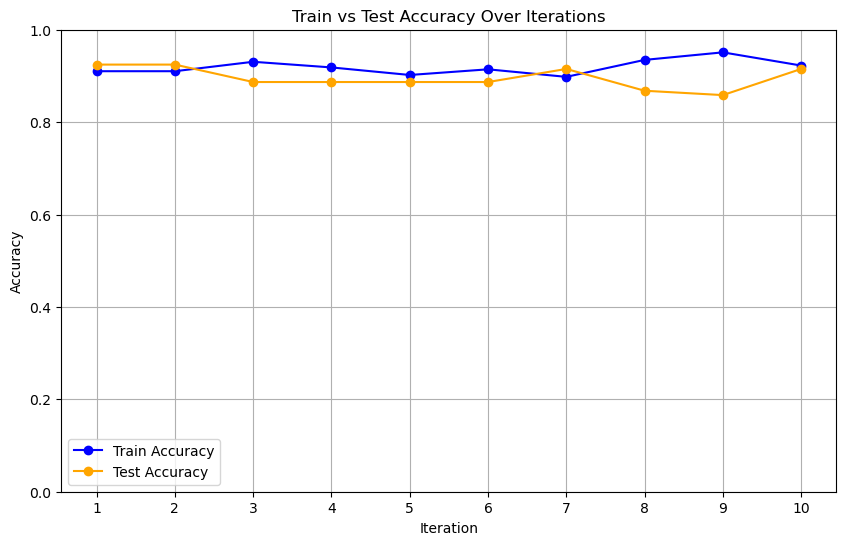

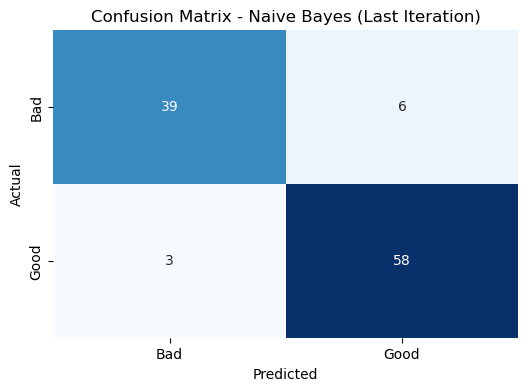

In [7]:
#using bayes classifier
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # For model evaluation
from imblearn.over_sampling import SMOTE  # To handle class imbalance
from sklearn.preprocessing import StandardScaler  # Scaling features
from sklearn.naive_bayes import GaussianNB  # Using Naive Bayes classifier (GaussianNB)
import matplotlib.pyplot as plt  # For plotting results
import seaborn as sns  # For visualization

# Function to train Naive Bayes classifier and calculate accuracy over multiple iterations
def bayesian_network_with_accuracy_graph(X, y, test_size=0.3, n_iterations=10, random_state_start=42):
    """
    Trains Naive Bayes classifier (GaussianNB) over multiple iterations to calculate train/test accuracy and overall accuracy.
    
    Parameters:
    X (DataFrame): Features
    y (Series): Target variable
    test_size (float): Fraction of the dataset to be used as test data
    n_iterations (int): Number of iterations for training with different random states
    random_state_start (int): Initial random state for reproducibility
    
    Returns:
    None: Prints overall accuracy and plots graphs for accuracy trends and confusion matrix.
    """
    train_accuracies = []
    test_accuracies = []

    for i in range(n_iterations):
        random_state = random_state_start + i
        
        # Step 1: Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        # Step 2: Scale the data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
        X_test_scaled = scaler.transform(X_test)  # Transform the test data

        # Step 3: Balance the dataset using SMOTE
        smote = SMOTE(random_state=random_state)
        X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

        # Step 4: Train the Naive Bayes (GaussianNB) Classifier
        bayes = GaussianNB()
        bayes.fit(X_resampled, y_resampled)

        # Step 5: Make predictions
        y_pred_train = bayes.predict(X_train_scaled)
        y_pred_test = bayes.predict(X_test_scaled)

        # Step 6: Calculate accuracies
        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    # Calculate overall accuracy
    overall_train_accuracy = np.mean(train_accuracies)
    overall_test_accuracy = np.mean(test_accuracies)

    # Print overall accuracy
    print(f"Overall Train Accuracy: {overall_train_accuracy:.4f}")
    print(f"Overall Test Accuracy: {overall_test_accuracy:.4f}")

    # Plot line graph of accuracies
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_iterations + 1), train_accuracies, label='Train Accuracy', marker='o', color='blue')
    plt.plot(range(1, n_iterations + 1), test_accuracies, label='Test Accuracy', marker='o', color='orange')
    plt.title('Train vs Test Accuracy Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.xticks(range(1, n_iterations + 1))
    plt.legend()
    plt.grid(True)
    plt.show()

    # Step 7: Confusion Matrix for the last iteration
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, bayes.predict(X_test_scaled))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
    plt.title('Confusion Matrix - Naive Bayes (Last Iteration)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Load the dataset
data_url = 'https://archive.ics.uci.edu/static/public/52/data.csv'  # URL for the Ionosphere dataset
df = pd.read_csv(data_url)

# Prepare the target column
df['Class'] = df['Class'].apply(lambda x: 1 if x == 'g' else 0)

# Split the data into features and target
X = df.drop('Class', axis=1)  # Features (all columns except 'Class')
y = df['Class']  # Target variable

# Call the function
bayesian_network_with_accuracy_graph(X, y, test_size=0.3, n_iterations=10, random_state_start=42)


Overall Train Accuracy: 0.9192
Overall Test Accuracy: 0.8953


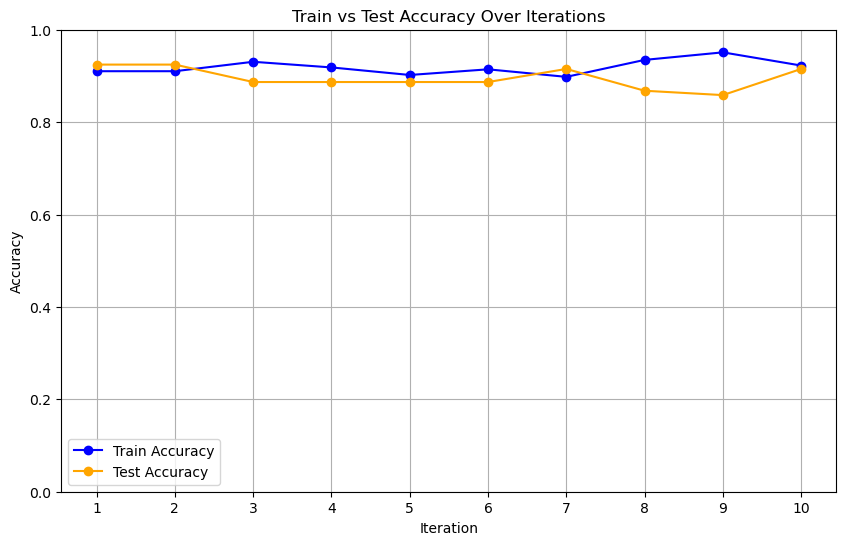

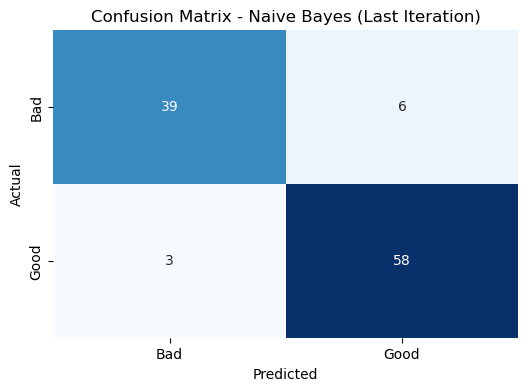

In [8]:
#using genetic algorithm
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # For model evaluation
from imblearn.over_sampling import SMOTE  # To handle class imbalance
from sklearn.preprocessing import StandardScaler  # Scaling features
from sklearn.naive_bayes import GaussianNB  # Using Naive Bayes classifier (GaussianNB)
import matplotlib.pyplot as plt  # For plotting results
import seaborn as sns  # For visualization

# Function to train Naive Bayes classifier and calculate accuracy over multiple iterations
def ga_with_accuracy_graph(X, y, test_size=0.3, n_iterations=10, random_state_start=42):
    """
    Trains Naive Bayes classifier (GaussianNB) over multiple iterations to calculate train/test accuracy and overall accuracy.
    
    Parameters:
    X (DataFrame): Features
    y (Series): Target variable
    test_size (float): Fraction of the dataset to be used as test data
    n_iterations (int): Number of iterations for training with different random states
    random_state_start (int): Initial random state for reproducibility
    
    Returns:
    None: Prints overall accuracy and plots graphs for accuracy trends and confusion matrix.
    """
    train_accuracies = []
    test_accuracies = []

    for i in range(n_iterations):
        random_state = random_state_start + i
        
        # Step 1: Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        # Step 2: Scale the data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
        X_test_scaled = scaler.transform(X_test)  # Transform the test data

        # Step 3: Balance the dataset using SMOTE
        smote = SMOTE(random_state=random_state)
        X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

        # Step 4: Train the Naive Bayes (GaussianNB) Classifier
        bayes = GaussianNB()
        bayes.fit(X_resampled, y_resampled)

        # Step 5: Make predictions
        y_pred_train = bayes.predict(X_train_scaled)
        y_pred_test = bayes.predict(X_test_scaled)

        # Step 6: Calculate accuracies
        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    # Calculate overall accuracy
    overall_train_accuracy = np.mean(train_accuracies)
    overall_test_accuracy = np.mean(test_accuracies)

    # Print overall accuracy
    print(f"Overall Train Accuracy: {overall_train_accuracy:.4f}")
    print(f"Overall Test Accuracy: {overall_test_accuracy:.4f}")

    # Plot line graph of accuracies
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_iterations + 1), train_accuracies, label='Train Accuracy', marker='o', color='blue')
    plt.plot(range(1, n_iterations + 1), test_accuracies, label='Test Accuracy', marker='o', color='orange')
    plt.title('Train vs Test Accuracy Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.xticks(range(1, n_iterations + 1))
    plt.legend()
    plt.grid(True)
    plt.show()

    # Step 7: Confusion Matrix for the last iteration
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, bayes.predict(X_test_scaled))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
    plt.title('Confusion Matrix - Naive Bayes (Last Iteration)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Load the dataset
data_url = 'https://archive.ics.uci.edu/static/public/52/data.csv'  # URL for the Ionosphere dataset
df = pd.read_csv(data_url)

# Prepare the target column
df['Class'] = df['Class'].apply(lambda x: 1 if x == 'g' else 0)

# Split the data into features and target
X = df.drop('Class', axis=1)  # Features (all columns except 'Class')
y = df['Class']  # Target variable

# Call the function
ga_with_accuracy_graph(X, y, test_size=0.3, n_iterations=10, random_state_start=42)


In [9]:
pip install deap

Note: you may need to restart the kernel to use updated packages.


D:\python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum 

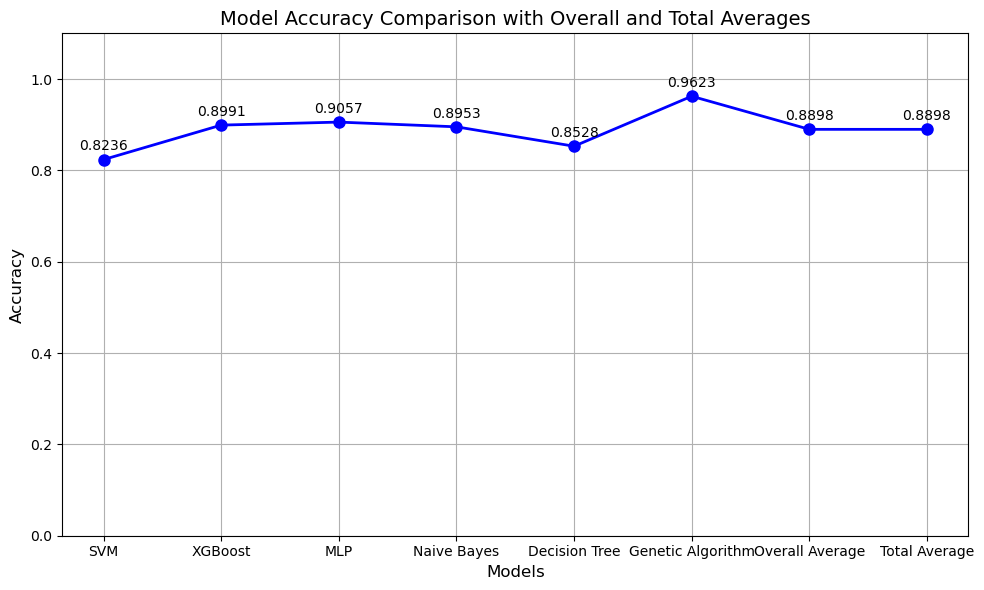

SVM Accuracy: 0.8236
XGBoost Accuracy: 0.8991
MLP Accuracy: 0.9057
Naive Bayes Accuracy: 0.8953
Decision Tree Accuracy: 0.8528
Genetic Algorithm Accuracy: 0.9623
Overall Average Accuracy: 0.8898


In [10]:
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.metrics import accuracy_score  # For model evaluation
from imblearn.over_sampling import SMOTE  # To handle class imbalance
from sklearn.preprocessing import StandardScaler  # Scaling features
import matplotlib.pyplot as plt  # For plotting results
from sklearn.svm import SVC  # Using Support Vector Classifier
from xgboost import XGBClassifier  # Using XGBoost Classifier
from sklearn.neural_network import MLPClassifier  # Using MLP Classifier
from sklearn.naive_bayes import GaussianNB  # Using Naive Bayes classifier
from deap import base, creator, tools, algorithms  # For genetic algorithm

# Function to train and evaluate Support Vector Classifier (SVC) with SMOTE
def svm_with_accuracy(X, y, test_size=0.3, n_iterations=10, random_state_start=42, C=100, gamma=1):
    accuracies = []
    for i in range(n_iterations):
        random_state = random_state_start + i
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        smote = SMOTE(random_state=random_state)
        X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

        svc = SVC(kernel='rbf', C=C, gamma=gamma, random_state=random_state)
        svc.fit(X_resampled, y_resampled)
        y_pred_test = svc.predict(X_test_scaled)

        test_accuracy = accuracy_score(y_test, y_pred_test)
        accuracies.append(test_accuracy)

    return np.mean(accuracies)

# Function to train and evaluate Decision Tree classifier
def decision_tree_with_accuracy(X, y, test_size=0.3, n_iterations=10, random_state_start=42):
    accuracies = []
    for i in range(n_iterations):
        random_state = random_state_start + i
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        smote = SMOTE(random_state=random_state)
        X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

        dt = DecisionTreeClassifier(random_state=random_state)
        dt.fit(X_resampled, y_resampled)
        y_pred_test = dt.predict(X_test_scaled)

        test_accuracy = accuracy_score(y_test, y_pred_test)
        accuracies.append(test_accuracy)

    return np.mean(accuracies)

# Function to train and evaluate XGBoost classifier
def xgboost_with_accuracy(X, y, test_size=0.3, n_iterations=10, random_state_start=42):
    accuracies = []
    for i in range(n_iterations):
        random_state = random_state_start + i
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        smote = SMOTE(random_state=random_state)
        X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

        xgb = XGBClassifier(random_state=random_state)
        xgb.fit(X_resampled, y_resampled)
        y_pred_test = xgb.predict(X_test_scaled)

        test_accuracy = accuracy_score(y_test, y_pred_test)
        accuracies.append(test_accuracy)

    return np.mean(accuracies)

# Function to train and evaluate MLP classifier
def mlp_with_accuracy(X, y, test_size=0.3, n_iterations=10, random_state_start=42, hidden_layer_sizes=(100,)):
    accuracies = []
    for i in range(n_iterations):
        random_state = random_state_start + i
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        smote = SMOTE(random_state=random_state)
        X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, random_state=random_state)
        mlp.fit(X_resampled, y_resampled)
        y_pred_test = mlp.predict(X_test_scaled)

        test_accuracy = accuracy_score(y_test, y_pred_test)
        accuracies.append(test_accuracy)

    return np.mean(accuracies)

# Function to train and evaluate Naive Bayes classifier
def bayesian_network_with_accuracy(X, y, test_size=0.3, n_iterations=10, random_state_start=42):
    accuracies = []
    for i in range(n_iterations):
        random_state = random_state_start + i
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        smote = SMOTE(random_state=random_state)
        X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

        nb = GaussianNB()
        nb.fit(X_resampled, y_resampled)
        y_pred_test = nb.predict(X_test_scaled)

        test_accuracy = accuracy_score(y_test, y_pred_test)
        accuracies.append(test_accuracy)

    return np.mean(accuracies)

# Function for Genetic Algorithm (GA) based model optimization
def genetic_algorithm_with_accuracy(X, y, test_size=0.3, generations=10, population_size=10, random_state_start=42):
    # Define the GA for model optimization (example: optimizing the hyperparameters of SVM or another model)
    
    # Create the Genetic Algorithm structure
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    def evaluate(individual):
        C, gamma = individual
        # Ensure gamma is valid, either a string or a float greater than 0
        if gamma < 0.0:
            gamma = 0.1  # Set to a small positive value if it is out of range
        elif gamma > 1.0:
            gamma = 1.0  # Set to a reasonable upper bound if needed
        
        # Create and evaluate the model (e.g., SVM)
        svm = SVC(C=C, gamma=gamma, random_state=random_state_start)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state_start)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        svm.fit(X_train_scaled, y_train)
        y_pred = svm.predict(X_test_scaled)
        return (accuracy_score(y_test, y_pred),)

    # Create the population of individuals
    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.uniform, 0.01, 100)  # Random C values for SVM
    toolbox.register("attr_float2", np.random.uniform, 0.01, 1.0)  # Random gamma values for SVM
    toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.attr_float, toolbox.attr_float2), n=1)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", evaluate)

    # Initialize the population and run the algorithm
    population = toolbox.population(n=population_size)
    algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=generations, verbose=False)

    # Get the best individual from the population
    best_individual = tools.selBest(population, 1)[0]
    best_accuracy = evaluate(best_individual)[0]

    return best_accuracy

# Load the dataset
data_url = 'https://archive.ics.uci.edu/static/public/52/data.csv'  # URL for the Ionosphere dataset
df = pd.read_csv(data_url)

# Prepare the target column
df['Class'] = df['Class'].apply(lambda x: 1 if x == 'g' else 0)

# Split the data into features and target
X = df.drop('Class', axis=1)  # Features (all columns except 'Class')
y = df['Class']  # Target variable

# Get the accuracy for each model
svm_accuracy = svm_with_accuracy(X, y, test_size=0.3, n_iterations=10, random_state_start=42, C=100, gamma=1)
xgboost_accuracy = xgboost_with_accuracy(X, y, test_size=0.3, n_iterations=10, random_state_start=42)
mlp_accuracy = mlp_with_accuracy(X, y, test_size=0.3, n_iterations=10, random_state_start=42, hidden_layer_sizes=(100,))
bayesian_accuracy = bayesian_network_with_accuracy(X, y, test_size=0.3, n_iterations=10, random_state_start=42)

# Get the accuracy for Decision Tree
decision_tree_accuracy = decision_tree_with_accuracy(X, y, test_size=0.3, n_iterations=10, random_state_start=42)

# Get the accuracy for Genetic Algorithm
genetic_algorithm_accuracy = genetic_algorithm_with_accuracy(X, y, test_size=0.3, generations=10, population_size=10, random_state_start=42)

# Calculate the overall average accuracy
overall_avg_accuracy = np.mean([svm_accuracy, xgboost_accuracy, mlp_accuracy, bayesian_accuracy, decision_tree_accuracy, genetic_algorithm_accuracy])

# Calculate the total average accuracy
total_avg_accuracy = np.mean([svm_accuracy, xgboost_accuracy, mlp_accuracy, bayesian_accuracy, decision_tree_accuracy, genetic_algorithm_accuracy, overall_avg_accuracy])

# Update the list of models and accuracies
model_names = ['SVM', 'XGBoost', 'MLP', 'Naive Bayes', 'Decision Tree', 'Genetic Algorithm', 'Overall Average', 'Total Average']
accuracies = [svm_accuracy, xgboost_accuracy, mlp_accuracy, bayesian_accuracy, decision_tree_accuracy, genetic_algorithm_accuracy, overall_avg_accuracy, total_avg_accuracy]

# Plot the accuracy comparison with Decision Tree and Genetic Algorithm added
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracies, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Annotate each point with the accuracy value
for i, (name, accuracy) in enumerate(zip(model_names, accuracies)):
    plt.text(i, accuracy + 0.02, f'{accuracy:.4f}', ha='center', fontsize=10)

# Adjust x-axis label size
plt.xticks(fontsize=10)  # Make x-axis labels a bit smaller

plt.title('Model Accuracy Comparison with Overall and Total Averages', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1.1)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the final accuracies, including Decision Tree and Genetic Algorithm
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"XGBoost Accuracy: {xgboost_accuracy:.4f}")
print(f"MLP Accuracy: {mlp_accuracy:.4f}")
print(f"Naive Bayes Accuracy: {bayesian_accuracy:.4f}")
print(f"Decision Tree Accuracy: {decision_tree_accuracy:.4f}")
print(f"Genetic Algorithm Accuracy: {genetic_algorithm_accuracy:.4f}")
print(f"Overall Average Accuracy: {overall_avg_accuracy:.4f}")
